# 1. Normality tests

Not all data is normally distributed. In this notebook we will see some of the most common normality tests.

## 1.1 Hypothesis testing 101

Hypothesis testing is a statistical method used to make inferences about a population based on sample data. It involves two main components:

    1. **Null Hypothesis (H0)**: This is the default assumption or the statement we're trying to disprove. It typically represents no effect or no difference.

    2. **Alternative Hypothesis (H1 or Ha)**: This is the statement we're testing against the null hypothesis. It represents a significant effect or difference.

The p-value is a crucial concept in hypothesis testing. It represents the probability of obtaining results at least as extreme as the observed results, assuming that the null hypothesis is true. In other words:

    - A small p-value (typically ≤ 0.05) suggests strong evidence against the null hypothesis. We would reject H0 in favor of H1.
    - A large p-value (> 0.05) indicates weak evidence against the null hypothesis. We would fail to reject H0.

### 1.1.1 Interpreting p-values:

    - p ≤ 0.05: We reject the null hypothesis. There's strong evidence supporting the alternative hypothesis.
    - p > 0.05: We fail to reject the null hypothesis. There's not enough evidence to support the alternative hypothesis.

It's important to note that p-values do not prove or disprove hypotheses. They only provide evidence for or against the null hypothesis. The significance level (usually 0.05) is chosen before conducting the test and represents the threshold for decision-making.

In the context of normality tests, the null hypothesis is typically that the data follows a normal distribution. A p-value ≤ 0.05 would suggest that the data significantly deviates from normality.

### 1.1.2 p-values as a probability

 
 The p-value can be understood as a conditional probability. Specifically, it is the probability of obtaining test results at least as extreme as the observed results, given that the null hypothesis is true. In mathematical notation, this can be expressed as:
 
 $$ P(\text{observed or more extreme data} \mid H_0 \text{ is true}) $$
 
 This interpretation emphasizes that the p-value is calculated under the assumption that the null hypothesis is true. It does not directly represent the probability that the null hypothesis is true or false. Instead, it quantifies the likelihood of seeing the observed data (or more extreme) if the null hypothesis were actually true.
 
 For example, in a normality test with a p-value of 0.03, we can interpret this as:
 "If the data were truly normally distributed (H0), the probability of observing our sample data (or data even less normal) is 3%."
 
 This conditional nature of p-values is crucial for proper interpretation in statistical hypothesis testing.
 


## 1.2 Shapiro-Wilk test

The Shapiro-Wilk test is a statistical test used to determine whether a sample of data comes from a normal distribution. It is based on the idea that the data should have similar patterns of deviation from the mean for both small and large values.

The test statistic is calculated as:

$$ W = \frac{(\sum_{i=1}^{n} a_i y_{(i)})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

Where:

- \( y_{(i)} \) are the ordered data points
- \( \bar{y} \) is the mean of the data
- \( a_i \) are constants calculated from the sample size and the data points

The null hypothesis is that the data is normally distributed. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that the data is not normally distributed.









In [4]:
import pandas as pd
import numpy as np

# Load the BTCUSDT data
df = pd.read_csv('data/BTC_USDT_5m.csv', sep=";")

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set 'timestamp' as the index
df.set_index('timestamp', inplace=True)

# Calculate log returns
df['log_returns'] = np.log(df['close'] / df['close'].shift(1))

# Remove the first row which will have a NaN log return
df = df.dropna()

print(df.head())
print("\nDataset shape:", df.shape)


                         open      high       low     close     volume  \
timestamp                                                                
2024-01-01 00:05:00  42397.22  42432.74  42385.26  42409.96  141.31102   
2024-01-01 00:10:00  42409.97  42488.09  42409.96  42488.00  135.14249   
2024-01-01 00:15:00  42488.00  42554.57  42458.58  42458.85  163.32541   
2024-01-01 00:20:00  42458.85  42491.10  42445.84  42473.93  117.27112   
2024-01-01 00:25:00  42473.93  42500.00  42412.02  42419.73  111.65236   

                     log_returns  
timestamp                         
2024-01-01 00:05:00     0.000300  
2024-01-01 00:10:00     0.001838  
2024-01-01 00:15:00    -0.000686  
2024-01-01 00:20:00     0.000355  
2024-01-01 00:25:00    -0.001277  

Dataset shape: (77872, 6)


In [6]:
from scipy import stats

# Perform Shapiro-Wilk test on log returns
statistic, p_value = stats.shapiro(df['log_returns'].head(100))

print("Shapiro-Wilk Test Results:")
print(f"Statistic: {statistic}")
print(f"p-value: {p_value}")

# Interpret the results
alpha = 0.05  # common significance level
if p_value > alpha:
    print("The log returns appear to be normally distributed (fail to reject H0)")
else:
    print("The log returns do not appear to be normally distributed (reject H0)")


Shapiro-Wilk Test Results:
Statistic: 0.9716390012205401
p-value: 0.02954878512420682
The log returns do not appear to be normally distributed (reject H0)


So, we can se that the p-valus is lower than 0.05, so we can reject the null hypothesis and conclude that the log returns are not normally distributed.

## 1.3 Jarque-Bera test

The Jarque-Bera test is a statistical test used to determine whether a sample of data follows a normal distribution. It is based on the skewness and kurtosis of the data.

The test statistic is calculated as:

$$ JB = \frac{n}{6} \left( S^2 + \frac{K - 3}{4} \right) $$

Where:

- \( S \) is the sample skewness
- \( K \) is the sample kurtosis
- \( n \) is the number of observations

The null hypothesis is that the data is normally distributed. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that the data is not normally distributed.







In [7]:
import statsmodels.stats.api as sms

# Perform Jarque-Bera test on log returns
jb_statistic, jb_p_value, skew, kurtosis = sms.jarque_bera(df['log_returns'])

print("Jarque-Bera Test Results:")
print(f"Statistic: {jb_statistic}")
print(f"p-value: {jb_p_value}")
print(f"Skewness: {skew}")
print(f"Kurtosis: {kurtosis}")

# Interpret the results
alpha = 0.05  # common significance level
if jb_p_value > alpha:
    print("The log returns appear to be normally distributed (fail to reject H0)")
else:
    print("The log returns do not appear to be normally distributed (reject H0)")


Jarque-Bera Test Results:
Statistic: 3644393.9785728124
p-value: 0.0
Skewness: -0.6725402073804486
Kurtosis: 36.48710116125518
The log returns do not appear to be normally distributed (reject H0)


Once again, we can see that the p-value is lower than 0.05, so we can reject the null hypothesis and conclude that the log returns are not normally distributed.

Note also that:

1. The p-value was 0.0.
2. The test was able to handle all the data at once.

# 2. Effect of sample size

Some tests are more powerful than others, meaning they can detect non-normality more effectively when it actually exists, especially for small sample sizes.

/Users/adolfovillalobos/Documents/projects/quant-finance-notebooks/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)
/Users/adolfovillalobos/Documents/projects/quant-finance-notebooks/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)
/Users/adolfovillalobos/Documents/projects/quant-finance-notebooks/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50000.
  res = hypotest_fun_out(*samples, **kwds)


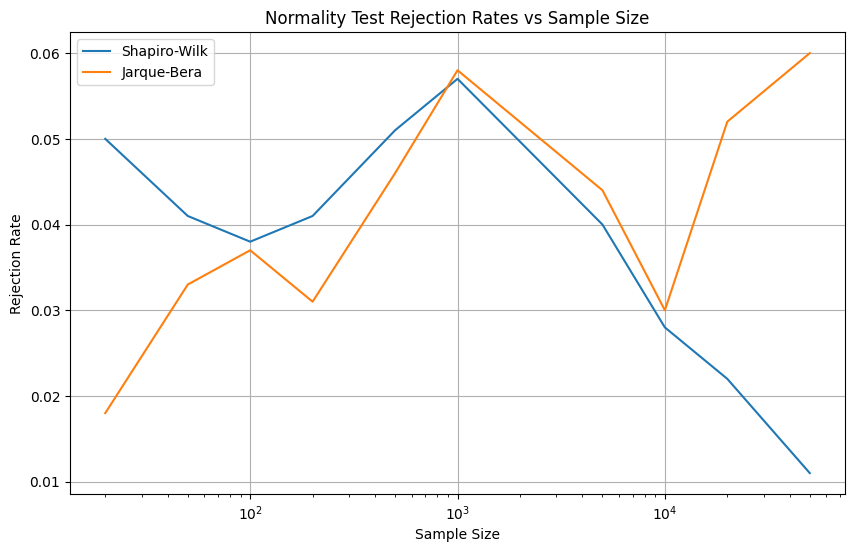

   sample_size  shapiro_wilk_reject_rate  jarque_bera_reject_rate
0           20                     0.050                    0.018
1           50                     0.041                    0.033
2          100                     0.038                    0.037
3          200                     0.041                    0.031
4          500                     0.051                    0.046
5         1000                     0.057                    0.058
6         5000                     0.040                    0.044
7        10000                     0.028                    0.030
8        20000                     0.022                    0.052
9        50000                     0.011                    0.060


In [9]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

def generate_normal_sample(n):
    return np.random.normal(0, 1, n)

def shapiro_wilk_test(data):
    statistic, p_value = stats.shapiro(data)
    return p_value

def jarque_bera_test(data):
    statistic, p_value = stats.jarque_bera(data)
    return p_value

sample_sizes = [20, 50, 100, 200, 500, 1000, 5000, 10000, 20000, 50000]
num_simulations = 1000

results = {
    'sample_size': [],
    'shapiro_wilk_reject_rate': [],
    'jarque_bera_reject_rate': []
}

for size in sample_sizes:
    sw_rejections = 0
    jb_rejections = 0
    
    for _ in range(num_simulations):
        sample = generate_normal_sample(size)
        
        if shapiro_wilk_test(sample) < 0.05:
            sw_rejections += 1
        
        if jarque_bera_test(sample) < 0.05:
            jb_rejections += 1
    
    results['sample_size'].append(size)
    results['shapiro_wilk_reject_rate'].append(sw_rejections / num_simulations)
    results['jarque_bera_reject_rate'].append(jb_rejections / num_simulations)

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.plot(results_df['sample_size'], results_df['shapiro_wilk_reject_rate'], label='Shapiro-Wilk')
plt.plot(results_df['sample_size'], results_df['jarque_bera_reject_rate'], label='Jarque-Bera')
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('Rejection Rate')
plt.title('Normality Test Rejection Rates vs Sample Size')
plt.legend()
plt.grid(True)
plt.show()

print(results_df)


In theory, we should have a 5% rejection rate for both tests, meaning that, on average, 5% of the time we should reject the null hypothesis (that the data is normally distributed) when it is actually normally distributed.

As the sample size increases, the rejection rate for the shapiro-wilks decreases, while the rejection rate for the jarque-bera increases. 